In [1]:
import f3dasm
import numpy as np

In [2]:
dim = 2
i = 50
r = 1
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
hyperparameters={}

design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensions=dim)

func = f3dasm.functions.Sphere(dimensionality=dim, noise=False, scale_bounds=bounds)
func.offset = np.atleast_2d(np.zeros(func.dimensionality))

data = f3dasm.Data(designspace=design)
optimizer = f3dasm.optimization.CMAES(data=data, hyperparameters=hyperparameters)
sampler = f3dasm.sampling.LatinHypercubeSampling(doe=design)


all_data = f3dasm.run_multiple_realizations(optimizer=optimizer, 
function=func,
sampler=sampler,
iterations=i,
realizations=r
)



In [29]:
func.dfdx(np.array([0.5, 0.8]))

array([[26.2144 , 41.94304]])

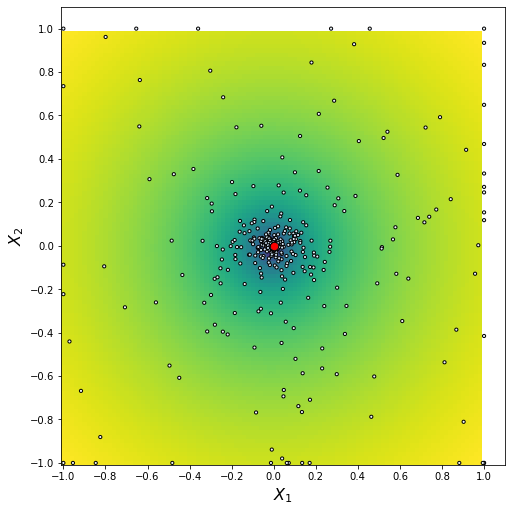

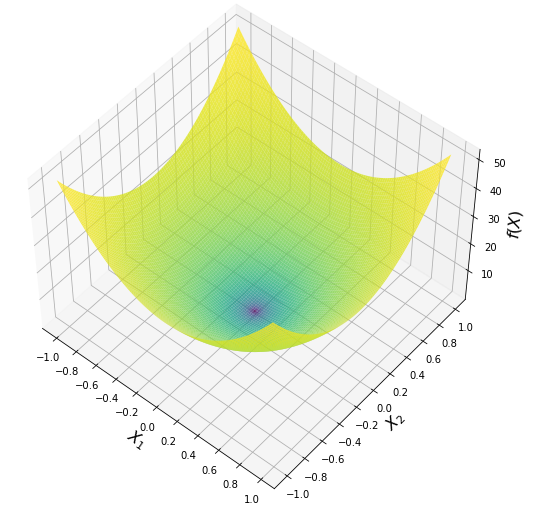

In [3]:
if dim == 2:
    fig, ax = func.plot_data(all_data[0], px=100, domain=bounds)
    ax.scatter(func.get_global_minimum(dim)[0][0],func.get_global_minimum(dim)[0][1], s=40, c='r')
    #ax.scatter(-3.19468541,0.89682456, s=40, c='g')
    func.plot(px=100, domain=bounds)

In [4]:
y = np.array([[0.2,0.1],[0.3,0.4]])
y + np.abs(func.get_global_minimum(2)[1])

array([[0.2, 0.1],
       [0.3, 0.4]])

In [5]:
all_data[0].data['input']

,x0,x1
0,9.725466e-01,0.002489
1,-9.162964e-01,-0.668189
2,-4.955021e-01,-0.551698
3,9.029004e-01,-0.810599
4,8.415886e-01,0.214644
...,...,...
1525,-4.057068e-05,-0.000055
1526,-1.030457e-04,0.000043
1527,-2.207590e-06,-0.000017
1528,-9.586498e-07,-0.000055


In [6]:
func.scale_bounds, func.input_domain

(array([[-1.,  1.],
        [-1.,  1.]]),
 array([[-5.12,  5.12],
        [-5.12,  5.12]]))

In [7]:
import pandas as pd
mean_y = pd.concat([d.get_output_data() for d in all_data], axis=1).mean(axis=1)
std_y = pd.concat([d.get_output_data() for d in all_data], axis=1).std(axis=1)
mean_y

0       2.479497e+01
1       3.371369e+01
2       1.441510e+01
3       3.859546e+01
4       1.977466e+01
            ...     
1525    1.228488e-07
1526    3.273383e-07
1527    7.616803e-09
1528    7.864275e-08
1529    1.013473e-07
Length: 1530, dtype: float64

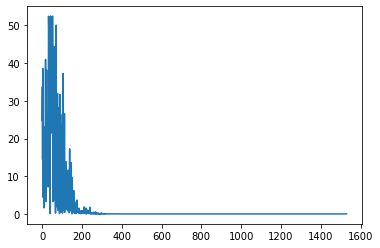

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.figure(), plt.axes()
ax.plot(mean_y)
ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, color='b', alpha=.1)
#ax.set_yscale('log')
fig.show()

In [9]:
func.get_global_minimum(2)

(array([0., 0.]), array([[0.]]))

In [10]:
func.descale_input(np.array([0.0,0.0]))
x = np.array([[0.0,0.0]])

In [11]:
func.input_domain

array([[-5.12,  5.12],
       [-5.12,  5.12]])

In [12]:
(func.input_domain[:, 1] - func.input_domain[:, 0]) * x + func.input_domain[:, 0]

array([[-5.12, -5.12]])

In [13]:
(x - func.input_domain[:, 0]) / (func.input_domain[:, 1] - func.input_domain[:, 0])

array([[0.5, 0.5]])

In [14]:
x

array([[0., 0.]])

In [15]:
func.input_domain[:, 0]

array([-5.12, -5.12])

In [16]:
x - func.input_domain[:, 0]

array([[5.12, 5.12]])

In [17]:
(func.input_domain[:, 1] - func.input_domain[:, 0])

array([10.24, 10.24])

In [18]:
o = np.array([[0.9,0.3]])
o

array([[0.9, 0.3]])

In [19]:
func.scale_input(func.descale_input(o))

array([[0.9, 0.3]])

In [20]:
func.descale_input(func.scale_input(o))
o

array([[0.9, 0.3]])

In [21]:
scale_bounds = [-3., 1.]

In [22]:
o = np.random.uniform(low=scale_bounds[0], high=scale_bounds[1], size=(1, func.dimensionality))
x = o
x

array([[-0.00657907,  0.3450608 ]])

In [23]:
(func.input_domain[:, 1] - func.input_domain[:, 0])

array([10.24, 10.24])

In [24]:
(x - func.scale_bounds[:, 0]) / (func.scale_bounds[:, 1] - func.scale_bounds[0])

array([[0.49671047,        inf]])

In [25]:
func.offset

array([[0., 0.]])

In [26]:
func.get_global_minimum(2)[0]

array([0., 0.])

In [27]:
(func.scale_bounds[:, 1] - func.scale_bounds[0])

array([2., 0.])